<a href="https://colab.research.google.com/github/hamzaharmanhusni/Project-Dicoding/blob/main/Klasifikasi_gambar_Project_Dicoding_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Hamzah Arman Husni

# Unduh Data dari Kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamzaharmanhusni","key":"c4d80967f856d7def87f1797b082acbf"}'}

In [ ]:
# install dan konfigurasi kaggle API
!pip install -q kaggle


In [ ]:
# Pindahkan file kaggle.json ke direktori .kaggle:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# Berikan izin akses yang tepat ke file kaggle.json:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d antobenedetti/animals

 98% 860M/882M [00:12<00:00, 94.8MB/s]
100% 882M/882M [00:12<00:00, 75.5MB/s]


In [ ]:
import zipfile

# Unzip file yang telah di download
nama_file_zip = 'animals.zip'
zip_extractor = zipfile.ZipFile(nama_file_zip)
zip_extractor.extractall()
zip_extractor.close()

In [ ]:
!ls animals

inf  train  val


In [ ]:
# Combined the images in train data and validated data
from PIL import Image
import os
import shutil

import os
import shutil

def combine_datasets(train_dir, validation_dir, combined_dir):
    # Make sure the combined directory exists, create it if not
    if not os.path.exists(combined_dir):
        os.makedirs(combined_dir)

    # Loop through each category in the training directory
    for category in os.listdir(train_dir):
        train_category_dir = os.path.join(train_dir, category)
        combined_category_dir = os.path.join(combined_dir, category)

        # Make sure the category directory in the combined directory exists, create it if not
        if not os.path.exists(combined_category_dir):
            os.makedirs(combined_category_dir)

        # Move files from the training directory to the combined directory
        for filename in os.listdir(train_category_dir):
            source_path = os.path.join(train_category_dir, filename)
            destination_path = os.path.join(combined_category_dir, filename)
            shutil.copy(source_path, destination_path)

    # Loop through each category in the validation directory
    for category in os.listdir(validation_dir):
        validation_category_dir = os.path.join(validation_dir, category)
        combined_category_dir = os.path.join(combined_dir, category)

        # Make sure the category directory in the combined directory exists, create it if not
        if not os.path.exists(combined_category_dir):
            os.makedirs(combined_category_dir)

        # Move files from the validation directory to the combined directory
        for filename in os.listdir(validation_category_dir):
            source_path = os.path.join(validation_category_dir, filename)
            destination_path = os.path.join(combined_category_dir, filename)
            shutil.copy(source_path, destination_path)

    print("Training and validation data have been combined into the folder", combined_dir)

# Contoh penggunaan
train_dir = 'animals/train'
validation_dir = 'animals/val'
combined_dir = 'animals_combined'

combine_datasets(train_dir, validation_dir, combined_dir)




Training and validation data have been combined into the folder animals_combined


In [ ]:
import os
animal_types = os.listdir('animals_combined')
animal_types

['cat', 'dog', 'lion', 'elephant', 'horse']

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("animals_combined"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 0 images in 'animals_combined'.
There are 0 directories and 2737 images in 'animals_combined/cat'.
There are 0 directories and 2627 images in 'animals_combined/dog'.
There are 0 directories and 2678 images in 'animals_combined/lion'.
There are 0 directories and 2732 images in 'animals_combined/elephant'.
There are 0 directories and 2951 images in 'animals_combined/horse'.


# Preprocessing

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, available_classes):
    # Choose a random class from the available classes
    random_class = random.choice(available_classes)

    # Setup target directory for the randomly chosen class
    target_folder = os.path.join(target_dir, random_class)

    # Get a random image path from the chosen class
    random_image = random.choice(os.listdir(target_folder))

    # Read in the image and plot it using matplotlib
    img_path = os.path.join(target_folder, random_image)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(random_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")

    return img




Image shape: (64, 64, 3)


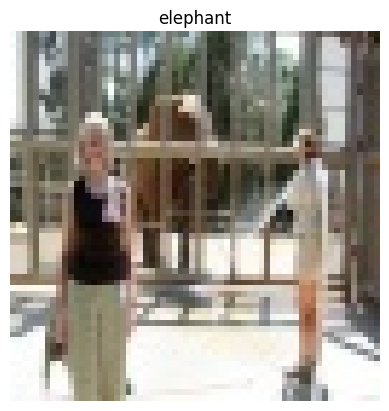

In [ ]:
# Specify the target directory and available classes
target_directory = "animals_combined"
available_classes = os.listdir(target_directory)

# View a random image from the dataset
img = view_random_image(target_dir=target_directory, available_classes=available_classes)
plt.show()



In [ ]:
# Melihat ukuran dari gambar
import os

animal_types = os.path.join('animals_combined')
list_animal_types = os.listdir(animal_types)

from PIL import Image
total = 0

for x in list_animal_types:
  dir = os.path.join(animal_types, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y

  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

cat: 2737
- (512, 512)
- (512, 512)
- (512, 512)
- (512, 512)
---------------
dog: 2627
- (512, 512)
- (512, 512)
- (512, 512)
- (512, 512)
---------------
lion: 2678
- (64, 64)
- (275, 183)
- (100, 100)
- (64, 64)
---------------
elephant: 2732
- (183, 275)
- (64, 64)
- (64, 64)
- (64, 64)
---------------
horse: 2951
- (301, 167)
- (64, 64)
- (64, 64)
- (500, 417)
---------------

Total : 13725


In [ ]:
import os
import mimetypes

def count_file_types(directory_path):
    file_count = {}

    # Loop through each file in the directory
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)

            # Get the MIME type of the file
            mime_type, _ = mimetypes.guess_type(file_path)

            # Use the MIME type as the key in the dictionary
            if mime_type in file_count:
                file_count[mime_type] += 1
            else:
                file_count[mime_type] = 1

    return file_count

# Example usage
directory_path = "animals_combined"
result = count_file_types(directory_path)

# Print the result
for mime_type, count in result.items():
    print(f"Total files with MIME type {mime_type}: {count}")

Total files with MIME type image/jpeg: 13469
Total files with MIME type image/png: 256


In [ ]:
from PIL import Image
import os

def convert_png_to_jpeg(png_path):
    try:
        # Open PNG image
        with Image.open(png_path) as img:
            # Convert and save as JPEG
            jpeg_path = os.path.splitext(png_path)[0] + ".jpeg"
            img.convert("RGB").save(jpeg_path, "JPEG")
        print(f"Conversion successful: {png_path} to {jpeg_path}")
    except Exception as e:
        print(f"Error converting {png_path}: {e}")

def batch_convert_png_to_jpeg(directory_path):
    # Loop through each file in the directory
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            # Check if the file is a PNG
            if file.lower().endswith(".png"):
                png_path = os.path.join(root, file)
                convert_png_to_jpeg(png_path)

# Example usage
directory_path = "animals_combined"
batch_convert_png_to_jpeg(directory_path)

Conversion successful: animals_combined/lion/lion1434.png to animals_combined/lion/lion1434.jpeg
Conversion successful: animals_combined/lion/lion2674.png to animals_combined/lion/lion2674.jpeg
Conversion successful: animals_combined/elephant/elephant2732.png to animals_combined/elephant/elephant2732.jpeg
Conversion successful: animals_combined/elephant/elephant1993.png to animals_combined/elephant/elephant1993.jpeg
Conversion successful: animals_combined/elephant/elephant1995.png to animals_combined/elephant/elephant1995.jpeg
Conversion successful: animals_combined/elephant/elephant1991.png to animals_combined/elephant/elephant1991.jpeg
Conversion successful: animals_combined/elephant/elephant1981.png to animals_combined/elephant/elephant1981.jpeg
Conversion successful: animals_combined/horse/horse94.png to animals_combined/horse/horse94.jpeg
Conversion successful: animals_combined/horse/horse195.png to animals_combined/horse/horse195.jpeg
Conversion successful: animals_combined/horse

## Image Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/animals_combined'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    )

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (150, 150),
    class_mode = "categorical",
    batch_size = 64,
    subset = 'training',
    color_mode = 'rgb'
)

val_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (150, 150),
    class_mode = "categorical",
    batch_size = 64,
    subset = 'validation',
    color_mode = 'rgb'
)

Found 11186 images belonging to 5 classes.
Found 2794 images belonging to 5 classes.


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Conv2D(filters=512, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.SeparableConv2D(filters=512, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.SeparableConv2D(filters=512, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.SeparableConv2D(filters=512, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.AdamW(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 149, 149, 512)     6656      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 512)       0         
 g2D)                                                            
                                                                 
 separable_conv2d (Separabl  (None, 71, 71, 512)       270848    
 eConv2D)                                                        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 35, 35, 512)       0         
 g2D)                                                            
                                                                 
 separable_conv2d_1 (Separa  (None, 32, 32, 512)       270848    
 bleConv2D)                                           

In [ ]:
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

#Call back function

auto_reduction_LR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2,
    verbose = 1,
    factor = 0.4,
    min_lr = 0.000003
)

auto_stop_learn = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta=0,
    patience = 5,
    verbose=1,
    mode= 'auto'
)

history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 50,
                    callbacks=[auto_reduction_LR,auto_stop_learn])

Epoch 1/50
175/175 [==============================] - 165s 867ms/step - loss: 1.6081 - accuracy: 0.2274 - val_loss: 1.6076 - val_accuracy: 0.2287 - lr: 0.0010
Epoch 2/50
175/175 [==============================] - 147s 840ms/step - loss: 1.6044 - accuracy: 0.2333 - val_loss: 1.5258 - val_accuracy: 0.3454 - lr: 0.0010
Epoch 3/50
175/175 [==============================] - 141s 803ms/step - loss: 1.4989 - accuracy: 0.3482 - val_loss: 1.4590 - val_accuracy: 0.3665 - lr: 0.0010
Epoch 4/50
175/175 [==============================] - 140s 801ms/step - loss: 1.4339 - accuracy: 0.3945 - val_loss: 1.3750 - val_accuracy: 0.4341 - lr: 0.0010
Epoch 5/50
175/175 [==============================] - 140s 797ms/step - loss: 1.3624 - accuracy: 0.4330 - val_loss: 1.2886 - val_accuracy: 0.4571 - lr: 0.0010
Epoch 6/50
175/175 [==============================] - 139s 796ms/step - loss: 1.2867 - accuracy: 0.4650 - val_loss: 1.1668 - val_accuracy: 0.5308 - lr: 0.0010
Epoch 7/50
175/175 [==========================

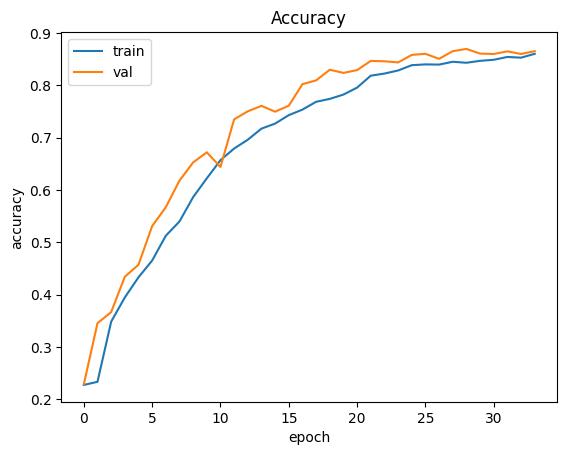

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

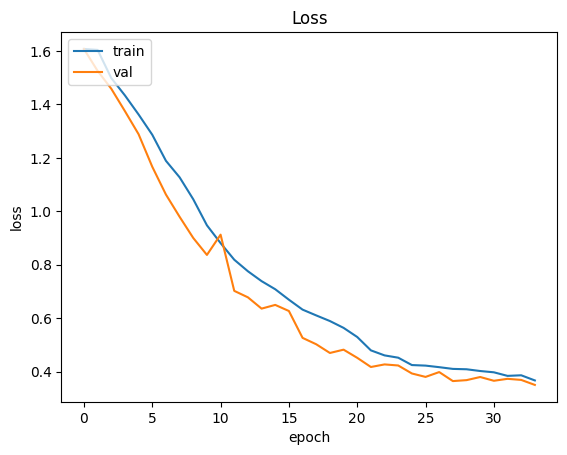

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  12725568 Feb  2 07:41 model.tflite
